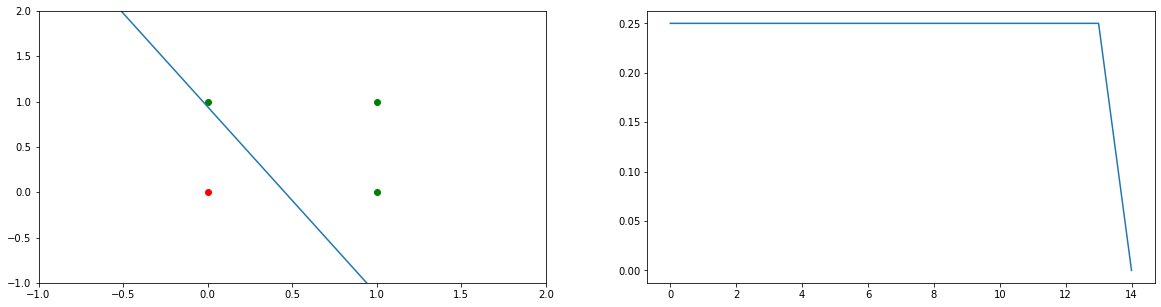

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from IPython import display

X1 = [0,0,1,1]
X2 = [0,1,0,1]
# Y  = [0,0,0,1] # AND
Y  = [0,1,1,1] # OR
# Y  = [0,1,1,0] # XOR

W = [random.random(), random.random()]
b = random.random()

# W = [random.uniform(-1,1), random.uniform(-1,1)]
# b = random.uniform(-1,1)

lr=0.01
theta=0.5
epoch = 0
count = 0

loss = []
while count < 4:
    
    total_error = 0
    for i in range(len(X1)):
        weighted_sum = W[0]*X1[i] + W[1]*X2[i] + b
        pred = 0
        if weighted_sum > theta:
            pred = 1
        
        error =  Y[i] - pred
        if error != 0:
            count = 0
            total_error += math.sqrt(error**2)
            
            W[0] += lr * error * X1[i]
            W[1] += lr * error * X2[i]
            b    += lr * error

        else:
            count += 1
    loss.append(1/4*total_error)
    
    plt.figure(figsize=(20,5))
    display.clear_output(wait=True)
    plt.subplot(1,2,1)
    for i in range(len(Y)):
        if Y[i] == 0:
            plt.plot(X1[i], X2[i], "ro")
        else:
            plt.plot(X1[i], X2[i], "go")
    plt.xlim([-1, 2])
    plt.ylim([-1, 2])

    xintr=(theta-b)/W[0]
    yintr=(theta-b)/W[1]

    slope=-yintr/xintr
    xx=plt.xlim()

    yeq = []
    for x in xx:
        yeq.append(slope*x+yintr)
    plt.plot(xx,yeq)
    
    
    plt.subplot(1,2,2)
    plt.plot(loss)
    
    plt.show()

    epoch += 1
    

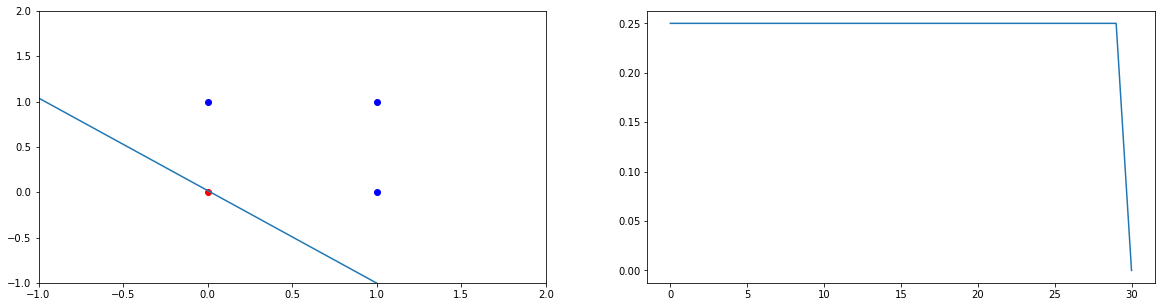

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from IPython import display

X1 = [0,0,1,1]
X2 = [0,1,0,1]
# Y  = [0,0,0,1] # AND
Y  = [0,1,1,1] # OR
# Y  = [0,1,1,0] # XOR

W = [random.random(), random.random()]
b = random.random()

# W = [random.uniform(-1,1), random.uniform(-1,1)]
# b = random.uniform(-1,1)

lr=0.01
theta=0.5
epoch = 0
count = 0

loss = []
while count < 4:
    
    total_error = 0
    for i in range(len(X1)):
        weighted_sum = W[0]*X1[i] + W[1]*X2[i] + b
        pred = 0
        if weighted_sum > theta:
            pred = 1
        
        error =  Y[i] - pred
        if error != 0:
            count = 0
            total_error += math.sqrt(error**2)
            
            W[0] += lr * error * X1[i]
            W[1] += lr * error * X2[i]
            b    += lr * error

        else:
            count += 1
    loss.append(1/4*total_error)
    
    plt.figure(figsize=(20,5))
    display.clear_output(wait=True)
    plt.subplot(1,2,1)
    for i in range(len(Y)):
        if Y[i] == 0:
            plt.plot(X1[i], X2[i], "ro")
        else:
            plt.plot(X1[i], X2[i], "bo")
    plt.xlim([-1, 2])
    plt.ylim([-1, 2])

    xintr=(theta-b)/W[0]
    yintr=(theta-b)/W[1]

    slope=-yintr/xintr
    xx=plt.xlim()

    yeq = []
    for x in xx:
        yeq.append(slope*x+yintr)
    plt.plot(xx,yeq)
    
    
    plt.subplot(1,2,2)
    plt.plot(loss)
    
    plt.show()

    epoch += 1

In [4]:
X1 = [0,0,1,1]
X2 = [0,1,0,1]
Y  = [0,1,0,1]

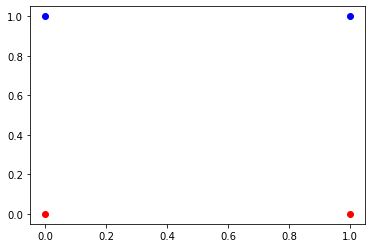

In [6]:
plt.figure()

for i in range(len(Y)):
    if Y[i] == 0:
        plt.plot(X1[i], X2[i], "ro")
    else:
        plt.plot(X1[i], X2[i], "bo")
        
plt.show()

In [7]:
X1 = df["X"].values.tolist()
X2 = df["Y"].values.tolist()
Y = df["LABEL"].values.tolist()

for i in range(len(Y)):
    if Y[i] == 0:
        plt.plot(X1[i], X2[i], "ro")
    else:
        plt.plot(X1[i], X2[i], "go")

NameError: name 'df' is not defined

In [8]:
import pandas as pd

df = pd.read_csv('./resources/M_1A_data2.csv')
df.head()

FileNotFoundError: [Errno 2] File ./resources/M_1A_data2.csv does not exist: './resources/M_1A_data2.csv'

In [9]:
X1 = df["X"].values.tolist()
X2 = df["Y"].values.tolist()
Y = df["LABEL"].values.tolist()

for i in range(len(Y)):
    if Y[i] == 0:
        plt.plot(X1[i], X2[i], "ro")
    else:
        plt.plot(X1[i], X2[i], "go")

NameError: name 'df' is not defined

In [10]:
X1 = df["X"].values.tolist()
X2 = df["Y"].values.tolist()
Y = df["LABEL"].values.tolist()

for i in range(len(Y)):
    if Y[i] == 0:
        plt.plot(X1[i], X2[i], "r+")
    else:
        plt.plot(X1[i], X2[i], "g+")

NameError: name 'df' is not defined

In [1]:
import pandas as pd

df = pd.read_csv('Untitled spreadsheet - Sheet1.csv')
df.head()

,X1,X2,Y
0,77,49,1
1,18,16,0
2,4,1,0
3,15,88,0
4,36,72,0


In [2]:
X1 = df["X"].values.tolist()
X2 = df["Y"].values.tolist()
Y = df["LABEL"].values.tolist()

for i in range(len(Y)):
    if Y[i] == 0:
        plt.plot(X1[i], X2[i], "r+")
    else:
        plt.plot(X1[i], X2[i], "b+")

KeyError: 'X'